# DS4400 Final Project - Models and Metrics
## Mirah Gordon, Genny Jawor, Caterina Wang

This notebook is dedicated to splitting, training, and testing the data using six different machine learning models. It also contains metrics to evaluate the successes and/or failures of these models as well as visualizations of results and analysis. The **drugs_clean.csv** file loaded in and used here was derived from the **cleaning** notebook and can be saved from running that notebook or otherwise accessed by the link in the cell below.

Shareable link for the csv to load in the dataset. <br>
https://drive.google.com/file/d/1oczqQdNmKpjXpzi4ZjZOOem9JlRXmZAk/view?usp=sharing

## Table of Contents
### Pre-Processing
* [Data Splitting](#Split)
* [Normalization](#Norm)

### Models
* [Logistic Regression](#LR)
* [Naive Bayes](#NB)
* [Decision Tree](#DTC)
* [Random Forest](#RFC)
* [AdaBoost](#ABC)
* [Multi Layer Perceptron](#MLP)

### Visualizations
* [Feature Importance](#FI)
* [ROC Curves](#Curves)

In [1]:
import pandas as pd
import numpy as np

# loading data
preprocessed_data = pd.read_csv('preprocessed_data.csv')
preprocessed_data_nb = pd.read_csv('preprocessed_data_nb.csv')
preprocessed_data_binary = pd.read_csv('preprocessed_data_binary.csv')
preprocessed_data_binary_nb = pd.read_csv('preprocessed_data_binary_nb.csv')

<a id='Split'></a>
### Data Splitting

In [2]:
# split dataset into train and test
from sklearn.model_selection import train_test_split

# multi class split 
x_drug = preprocessed_data.drop('rating', axis=1)
y_drug = preprocessed_data['rating']
x_train, x_test, y_train, y_test = train_test_split(x_drug, y_drug, test_size=0.25)

# multi class naive bayes split
x_drug_nb = preprocessed_data_nb.drop('rating', axis=1)
y_drug_nb = preprocessed_data_nb['rating']
x_train_nb, x_test_nb, y_train_nb, y_test_nb = train_test_split(x_drug_nb, y_drug_nb, test_size=0.25, stratify=preprocessed_data_binary[["numericalDrugName"]])

# binary split 
x_drug_b = preprocessed_data_binary.drop('rating_binary', axis=1)
y_drug_b = preprocessed_data_binary['rating_binary']
x_train_binary, x_test_binary, y_train_binary, y_test_binary = train_test_split(x_drug_b, y_drug_b, test_size=0.25)

# binary naive bayes split
x_drug_nb_b = preprocessed_data_binary_nb.drop('rating_binary', axis=1)
y_drug_nb_b = preprocessed_data_binary_nb['rating_binary']
x_train_nb_b, x_test_nb_b, y_train_nb_b, y_test_nb_b = train_test_split(x_drug_nb_b, y_drug_nb_b, test_size=0.25, stratify=preprocessed_data_binary[["numericalDrugName"]])

<a id='Norm'></a>
### Normalization

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# For Normalizing the data in the other columns - turns raw data into z-scores
# needs to be run on drugs['rating'] and drugs['usefulCount']

def scale_numerical_data(train, test, scaler="standard"):
    col_names = ['usefulCount', 'word_count', 'char_count']
    train_features = train[col_names]
    test_features = test[col_names]
    scaler = StandardScaler().fit(train_features.values)
    train = scaler.transform(train_features.values)
    test = scaler.transform(test_features.values)

    useful_train = train[:,0]
    word_train = train[:,1]
    char_train = train[:, 2]

    useful_test = test[:, 0]
    word_test = test[:,1]
    char_test = test[:, 2]

    return useful_train, useful_test, word_train, word_test, char_train, char_test

useful_train, useful_test, word_train, word_test, char_train, char_test = scale_numerical_data(x_train, x_test)
useful_train_b, useful_test_b, word_train_b, word_test_b, char_train_b, char_test_b = scale_numerical_data(x_train_binary, x_test_binary)
useful_train_nb, useful_test_nb, word_train_nb, word_test_nb, char_train_nb, char_test_nb = scale_numerical_data(x_train_nb, x_test_nb)
useful_train_nb_b, useful_test_nb_b, word_train_nb_b, word_test_nb_b, char_train_nb_b, char_test_nb_b = scale_numerical_data(x_train_nb_b, x_test_nb_b)

x_train['usefulCount'] = useful_train
x_train['word_count'] = word_train
x_train['char_count'] = char_train

x_test['usefulCount'] = useful_test
x_test['word_count'] = word_test
x_test['char_count'] = char_test

x_train_binary['usefulCount'] = useful_train_b
x_train_binary['word_count'] = word_train_b
x_train_binary['char_count'] = char_train_b

x_test_binary['usefulCount'] = useful_test_b
x_test_binary['word_count'] = word_test_b
x_test_binary['char_count'] = char_test_b

x_train_nb['usefulCount'] = useful_train_nb
x_train_nb['word_count'] = word_train_nb
x_train_nb['char_count'] = char_train_nb

x_test_nb['usefulCount'] = useful_test_nb
x_test_nb['word_count'] = word_test_nb
x_test_nb['char_count'] = char_test_nb

x_train_nb_b['usefulCount'] = useful_train_nb_b
x_train_nb_b['word_count'] = word_train_nb_b
x_train_nb_b['char_count'] = char_train_nb_b

x_test_nb_b['usefulCount'] = useful_test_nb_b
x_test_nb_b['word_count'] = word_test_nb_b
x_test_nb_b['char_count'] = char_test_nb_b

<ipython-input-3-e9effa239d4f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['usefulCount'] = useful_train
<ipython-input-3-e9effa239d4f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['word_count'] = word_train
<ipython-input-3-e9effa239d4f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

### Metrics

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score, roc_auc_score

In [5]:
"""
Function to print metrics for a given model and return metrics in a dataframe
"""
def print_metrics(x, y, model, model_name, multiclass=False):
    # define columns for dataframe
    if multiclass==True:
        column_names = ['Accuracy', 'Error', 'F1 Score', 'Precision', 'Recall', 'Cohen Kappa']
    else:
        column_names = ['Accuracy', 'Error', 'F1 Score', 'AUC', 'Precision', 'Recall']
    # create empty datafram to hold metrics 
    metrics = pd.DataFrame(columns=column_names)
    
    # predict y given x
    pred = model.predict(x)
    # calculate accuracy 
    accuracy = accuracy_score(y, pred)
    # calculate f1
    if multiclass==True:
        f1 = f1_score(y, pred, average='micro')
    else:
        f1 = f1_score(y, pred)
    # calculate auc
    if multiclass==True:
        pass
    else:
        auc = roc_auc_score(y, model.predict_proba(x)[:, 1], average='weighted', multi_class='ovr')
    # calculate precision
    precision = precision_score(y, pred, average='weighted', labels=np.unique(pred))
    # calculate recall
    recall = recall_score(y, pred, average='weighted')
    # calculate cohen kappa 
    if multiclass==True:
        c_kappa = cohen_kappa_score(y, pred)
    else:
        pass
    
    # add values to metrics
    if multiclass==True:
        metrics.loc[len(metrics.index)] = [accuracy, 1 - accuracy, f1, precision, recall, c_kappa]
    else:
        metrics.loc[len(metrics.index)] = [accuracy, 1 - accuracy, f1, auc, precision, recall]
    
    print(model_name)
    display(metrics)

<a id='LR'></a>
### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
# multi class logistic regression
logistic_reg_multi = LogisticRegression(max_iter=10000, solver='sag', multi_class='multinomial')
logistic_reg_multi.fit(x_train, y_train)

print_metrics(x_train, y_train, logistic_reg_multi, "Logistic Regression: Training Data Multi Class", multiclass=True)
print_metrics(x_test, y_test, logistic_reg_multi, "Logistic Regression: Testing Data Multi Class", multiclass=True)

Logistic Regression: Training Data Multi Class


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.310341,0.689659,0.310341,0.225144,0.310341,0.100604


Logistic Regression: Testing Data Multi Class


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.312482,0.687518,0.312482,0.421005,0.312482,0.102479


In [8]:
# multi class logistic regression
logistic_reg_binary = LogisticRegression(max_iter=10000, solver='sag')
logistic_reg_binary.fit(x_train_binary, y_train_binary)

print_metrics(x_train_binary, y_train_binary, logistic_reg_binary, "Logistic Regression: Training Data Binary")
print_metrics(x_test_binary, y_test_binary, logistic_reg_binary, "Logistic Regression: Testing Data Binary")

Logistic Regression: Training Data Binary


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.723722,0.276278,0.810622,0.74146,0.70803,0.723722


Logistic Regression: Testing Data Binary


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.718226,0.281774,0.806464,0.735931,0.702297,0.718226


<a id='NB'></a>
### Naive Bayes

In [9]:
from mixed_naive_bayes import MixedNB

In [10]:
# multi class naive bayes
nb_multi = MixedNB(categorical_features=[1,4,5])
nb_multi.fit(x_train_nb, y_train_nb)

print_metrics(x_train_nb, y_train_nb, nb_multi, "Naive Bayes: Training Data Multi Class", multiclass=True)
print_metrics(x_test_nb, y_test_nb, nb_multi, "Naive Bayes: Testing Data Multi Class", multiclass=True)

[  3  10 694]
Naive Bayes: Training Data Multi Class


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.29314,0.70686,0.29314,0.27387,0.29314,0.141705


Naive Bayes: Testing Data Multi Class


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.285668,0.714332,0.285668,0.233687,0.285668,0.130574


In [11]:
# binary naive bayes
nb_binary = MixedNB(categorical_features=[1,4,5])
nb_binary.fit(x_train_nb_b, y_train_nb_b)

print_metrics(x_train_nb_b, y_train_nb_b, nb_binary, "Naive Bayes: Training Data Binary")
print_metrics(x_test_nb_b, y_test_nb_b, nb_binary, "Naive Bayes: Testing Data Binary")

[  3  10 694]
Naive Bayes: Training Data Binary


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.667861,0.332139,0.731051,0.6552,0.715542,0.667861


Naive Bayes: Testing Data Binary


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.664233,0.335767,0.729413,0.65517,0.714104,0.664233


<a id='DTC'></a>
### Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [13]:
# multi class decision tree
for split in ['gini', 'entropy']:
    tree = DTC(random_state=0, criterion=split)
    tree.fit(x_train, y_train)
    print_metrics(x_train, y_train, tree, "Decision Tree: Training Data Multi Class " + split +  " split", multiclass=True)
    print_metrics(x_test, y_test, tree, "Decision Tree: Testing Data Multi Class " + split + " split", multiclass=True)

Decision Tree: Training Data Multi Class gini split


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.998026,0.001974,0.998026,0.998031,0.998026,0.997662


Decision Tree: Testing Data Multi Class gini split


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.396901,0.603099,0.396901,0.398684,0.396901,0.286589


Decision Tree: Training Data Multi Class entropy split


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.998026,0.001974,0.998026,0.998031,0.998026,0.997662


Decision Tree: Testing Data Multi Class entropy split


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.44627,0.55373,0.44627,0.448533,0.44627,0.345469


In [14]:
# binary decision tree
for split in ['gini', 'entropy']:
    tree_binary = DTC(random_state=0, criterion=split)
    tree_binary.fit(x_train_binary, y_train_binary)
    print_metrics(x_train_binary, y_train_binary, tree_binary, "Decision Tree: Training Data Binary " + split + " split")
    print_metrics(x_test_binary, y_test_binary, tree_binary, "Decision Tree: Testing Data Binary " + split + " split")

Decision Tree: Training Data Binary gini split


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.998999,0.001001,0.999272,0.999998,0.999003,0.998999


Decision Tree: Testing Data Binary gini split


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.706543,0.293457,0.784548,0.66433,0.710254,0.706543


Decision Tree: Training Data Binary entropy split


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.998999,0.001001,0.999272,0.999998,0.999003,0.998999


Decision Tree: Testing Data Binary entropy split


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.7106,0.2894,0.788735,0.665834,0.712205,0.7106


<a id='RFC'></a>
### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [16]:
# multi class random forest

# define number of trees 
trees = [50, 100, 250, 500]

# define classifier
for num_trees in trees:
    rand_forest = RFC(n_estimators=num_trees, random_state=42)
    rand_forest.fit(x_train, y_train)
    print_metrics(x_train, y_train, rand_forest, "Random Forest: Training Data Multi Class " + str(num_trees) + " trees", multiclass=True)
    print_metrics(x_test, y_test, rand_forest, "Random Forest: Testing Data Multi Class " + str(num_trees)+ " trees", multiclass=True)

Random Forest: Training Data Multi Class 50 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.998012,0.001988,0.998012,0.998013,0.998012,0.997645


Random Forest: Testing Data Multi Class 50 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.421078,0.578922,0.421078,0.405807,0.421078,0.294511


Random Forest: Training Data Multi Class 100 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.998026,0.001974,0.998026,0.998026,0.998026,0.997661


Random Forest: Testing Data Multi Class 100 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.425703,0.574297,0.425703,0.409616,0.425703,0.298485


Random Forest: Training Data Multi Class 250 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.998026,0.001974,0.998026,0.998026,0.998026,0.997661


Random Forest: Testing Data Multi Class 250 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.432031,0.567969,0.432031,0.416109,0.432031,0.304951


Random Forest: Training Data Multi Class 500 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.998026,0.001974,0.998026,0.998026,0.998026,0.997661


Random Forest: Testing Data Multi Class 500 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.431504,0.568496,0.431504,0.41553,0.431504,0.303874


In [17]:
# binary random forest

# define number of trees 
trees = [50, 100, 250, 500]

# define classifier
for num_trees in trees:
    rand_forest = RFC(n_estimators=num_trees, random_state=42)
    rand_forest.fit(x_train_binary, y_train_binary)
    print_metrics(x_train_binary, y_train_binary, rand_forest, "Random Forest: Training Data Binary " + str(num_trees) + " trees")
    print_metrics(x_test_binary, y_test_binary, rand_forest, "Random Forest: Testing Data Binary " + str(num_trees) + " trees")

Random Forest: Training Data Binary 50 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.998702,0.001298,0.999056,0.99999,0.998702,0.998702


Random Forest: Testing Data Binary 50 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.758144,0.241856,0.830538,0.806882,0.749585,0.758144


Random Forest: Training Data Binary 100 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.998959,0.001041,0.999243,0.999996,0.998959,0.998959


Random Forest: Testing Data Binary 100 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.762565,0.237435,0.834132,0.811627,0.753825,0.762565


Random Forest: Training Data Binary 250 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.998999,0.001001,0.999273,0.999997,0.998999,0.998999


Random Forest: Testing Data Binary 250 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.762281,0.237719,0.834463,0.812356,0.753065,0.762281


Random Forest: Training Data Binary 500 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.998999,0.001001,0.999273,0.999997,0.998999,0.998999


Random Forest: Testing Data Binary 500 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.762728,0.237272,0.8349,0.813407,0.753445,0.762728


<a id='ABC'></a>
### AdaBoost Classifier

In [18]:
from sklearn.ensemble import AdaBoostClassifier as ABC

In [19]:
# multi class adaboost

# define classifier
for num_clf in [10, 50, 100, 500]:
    adaboost = ABC(n_estimators=num_clf)
    adaboost.fit(x_train, y_train)
    print_metrics(x_train, y_train, adaboost, "AdaBoost: Training Data Multi Class " + str(num_clf) + " classifiers", multiclass=True)
    print_metrics(x_test, y_test, adaboost, "AdaBoost: Testing Data Multi Class " + str(num_clf) + " classifiers", multiclass=True)

AdaBoost: Training Data Multi Class 10 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.313938,0.686062,0.313938,0.271198,0.313938,0.103643


AdaBoost: Testing Data Multi Class 10 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.314997,0.685003,0.314997,0.252193,0.314997,0.104465


AdaBoost: Training Data Multi Class 50 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.317345,0.682655,0.317345,0.248214,0.317345,0.110923


AdaBoost: Testing Data Multi Class 50 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.318445,0.681555,0.318445,0.249102,0.318445,0.111766


AdaBoost: Training Data Multi Class 100 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.317792,0.682208,0.317792,0.237323,0.317792,0.112989


AdaBoost: Testing Data Multi Class 100 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.319176,0.680824,0.319176,0.21262,0.319176,0.114248


AdaBoost: Training Data Multi Class 500 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.320131,0.679869,0.320131,0.221759,0.320131,0.118054


AdaBoost: Testing Data Multi Class 500 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.321042,0.678958,0.321042,0.251201,0.321042,0.119053


In [20]:
# binary adaboost

# define classifier
for num_clf in [10, 50, 100, 500]:
    adaboost = ABC(n_estimators=num_clf)
    adaboost.fit(x_train_binary, y_train_binary)
    print_metrics(x_train_binary, y_train_binary, adaboost, "AdaBoost: Training Data Binary " + str(num_clf) + " classifiers")
    print_metrics(x_test_binary, y_test_binary, adaboost, "AdaBoost: Testing Data Binary " + str(num_clf) + " classifiers")

AdaBoost: Training Data Binary 10 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.729131,0.270869,0.813347,0.747961,0.715085,0.729131


AdaBoost: Testing Data Binary 10 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.722932,0.277068,0.808447,0.740835,0.708951,0.722932


AdaBoost: Training Data Binary 50 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.735,0.265,0.819594,0.76012,0.719809,0.735


AdaBoost: Testing Data Binary 50 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.727394,0.272606,0.814149,0.75118,0.711266,0.727394


AdaBoost: Training Data Binary 100 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.738219,0.261781,0.822487,0.763783,0.72312,0.738219


AdaBoost: Testing Data Binary 100 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.729869,0.270131,0.8164,0.754923,0.713655,0.729869


AdaBoost: Training Data Binary 500 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.745264,0.254736,0.827828,0.772299,0.731186,0.745264


AdaBoost: Testing Data Binary 500 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.737739,0.262261,0.822278,0.762077,0.722472,0.737739


<a id='MLP'></a>
### Multi Layer Perceptron Classifier (Neural Network)

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
# multi class mlp
mlp = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)


print_metrics(x_train, y_train, mlp, "MLP: Training Data Multi Class", multiclass=True)
print_metrics(x_test, y_test, mlp, "MLP: Testing Data Multi Class", multiclass=True)

MLP: Training Data Multi Class


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.318197,0.681803,0.318197,0.340443,0.318197,0.111943


MLP: Testing Data Multi Class


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.319176,0.680824,0.319176,0.200961,0.319176,0.113161


In [23]:
# binary mlp
mlp_binary = MLPClassifier(random_state=1, max_iter=300).fit(x_train_binary, y_train_binary)

print_metrics(x_train_binary, y_train_binary, mlp_binary, "MLP: Training Data Binary")
print_metrics(x_test_binary, y_test_binary, mlp_binary, "MLP: Testing Data Binary")

MLP: Training Data Binary


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.718638,0.281362,0.82171,0.747654,0.700952,0.718638


MLP: Testing Data Binary


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.71774,0.28226,0.821048,0.739926,0.698807,0.71774


<a id='FI'></a>
### Feature Importance

In [24]:
import matplotlib.pyplot as plt

In [25]:
column_names = list(preprocessed_data)

In [26]:
# mutli class feature importance
rand_forest = RFC(n_estimators=250, random_state=42)
rand_forest = rand_forest.fit(x_train, y_train)

feat_import = rand_forest.feature_importances_
imp_df = pd.DataFrame()
imp_df['importance'] = feat_import
imp_df.index = column_names[1:]

Text(0, 0.5, 'Importance')

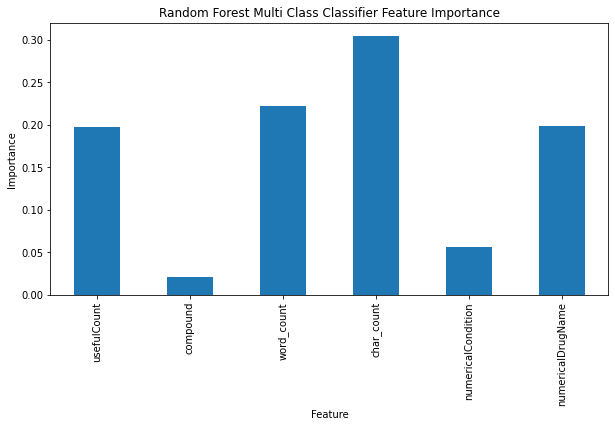

In [27]:
# plotting graph
importances = pd.Series(feat_import, index=column_names[1:])
fig, ax = plt.subplots(figsize=(10, 5))
importances.plot.bar(ax=ax)
ax.set_title('Random Forest Multi Class Classifier Feature Importance')
ax.set_xlabel('Feature')
ax.set_ylabel('Importance')

In [28]:
column_names = list(preprocessed_data_binary)

In [29]:
# binary feature importance
rand_forest = RFC(n_estimators=250, random_state=42)
rand_forest = rand_forest.fit(x_train_binary, y_train_binary)

feat_import = rand_forest.feature_importances_
imp_df = pd.DataFrame()
imp_df['importance'] = feat_import
imp_df.index = column_names[:2] + column_names[2+1:]

Text(0, 0.5, 'Importance')

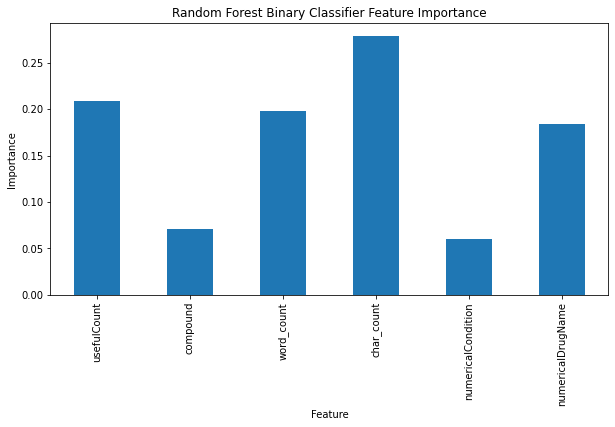

In [30]:
# plotting graph
importances = pd.Series(feat_import, index=column_names[:2] + column_names[2+1:])
fig, ax = plt.subplots(figsize=(10, 5))
importances.plot.bar(ax=ax)
ax.set_title('Random Forest Binary Classifier Feature Importance')
ax.set_xlabel('Feature')
ax.set_ylabel('Importance')

<a id='Curves'></a>
### ROC Curves

In [31]:
from sklearn import metrics
from sklearn.metrics import plot_roc_curve

In [32]:
# ROC curve: Logistic Regression Binary
logistic_reg_binary = LogisticRegression(max_iter=10000, solver='sag')
logistic_reg_binary = logistic_reg_binary.fit(x_train_binary, y_train_binary)

In [33]:
# ROC curve: Decision Tree Binary
dtc = DTC(random_state=0, criterion='gini')
dtc = dtc.fit(x_train_binary, y_train_binary)

In [34]:
# ROC curve: Random Forest Binary
rfc = RFC(n_estimators=250, random_state=42, criterion='entropy')
rfc = rfc.fit(x_train_binary, y_train_binary)

In [35]:
# ROC curve: AdaBoost Binary
abc = ABC(n_estimators=100)
abc = abc.fit(x_train_binary, y_train_binary)

In [36]:
# ROC curve: MLP Binary
mlp = MLPClassifier(random_state=1, max_iter=300).fit(x_train_binary, y_train_binary)

Text(0.5, 1.0, 'ROC Curve Comparison for Binary Classification Models')

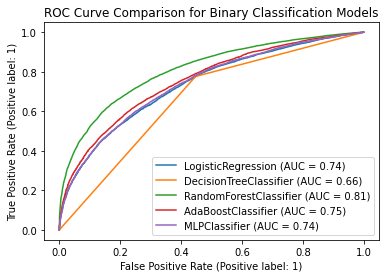

In [37]:
# all models in a list
curves = [logistic_reg_binary, dtc, rfc, abc, mlp]

# iterate through each model and plot the curve
ax = plt.gca()
for c in curves:
    plot_roc_curve(c, x_test_binary, y_test_binary, ax=ax)

plt.title('ROC Curve Comparison for Binary Classification Models')